# Clustering

In this notebook I cluster the sign distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy

from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering

get collective sign distributions:

In [2]:
# load one collective sign distribution
def get_collective_sign_distr(n, name):

    # collect all the sign distributions in one huge dataFrame
    coll_sign_distr = pd.DataFrame()
    for i in range(n):
        sign_distr = pd.read_csv(f'2b Sign distributions/{name}_{i}_sign_distr.csv')
        coll_sign_distr = pd.concat([coll_sign_distr, sign_distr])
    # seperate the dataframe by layer
    coll_sign_distr_layer1 = coll_sign_distr[coll_sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
    coll_sign_distr_layer2 = coll_sign_distr[coll_sign_distr["layer"]=="dense2"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
    
    return coll_sign_distr_layer1, coll_sign_distr_layer2

In [3]:
coll_sign_distr_layer1, coll_sign_distr_layer2 = get_collective_sign_distr(15, "CIFAR_IMP")

perform clustering:

In [4]:
def cluster_sign_distr(sign_distr, n_clusters = 2, algorithm = AgglomerativeClustering):

    sign_distr = copy.copy(sign_distr)
    
    # preprocess the data
    sign_distr_array = []
    for index, row in sign_distr.iterrows():
        sign_distr_array.append(row.to_numpy())
    sign_distr_array = np.array(sign_distr_array)
    
    # clustering
    clustering = algorithm(n_clusters=n_clusters)
    clustering.fit(sign_distr_array)
    labels = clustering.labels_
    
    # append labels to dataframe
    labels_df = pd.DataFrame(labels, index=range(len(labels)),columns=["cluster"])
    sign_distr = sign_distr.reset_index(drop=True)
    sign_distr = pd.concat([sign_distr, labels_df], axis=1)
    
    # show scatterplot matrix
    sns.pairplot(sign_distr, hue="cluster", height=1.75, kind='scatter', plot_kws={'alpha':0.8})
    
    return sign_distr

C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

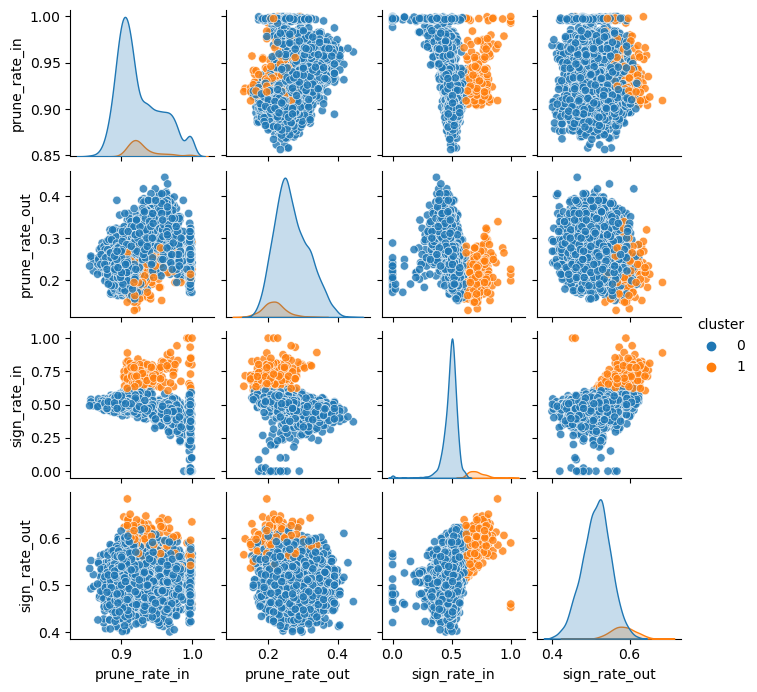

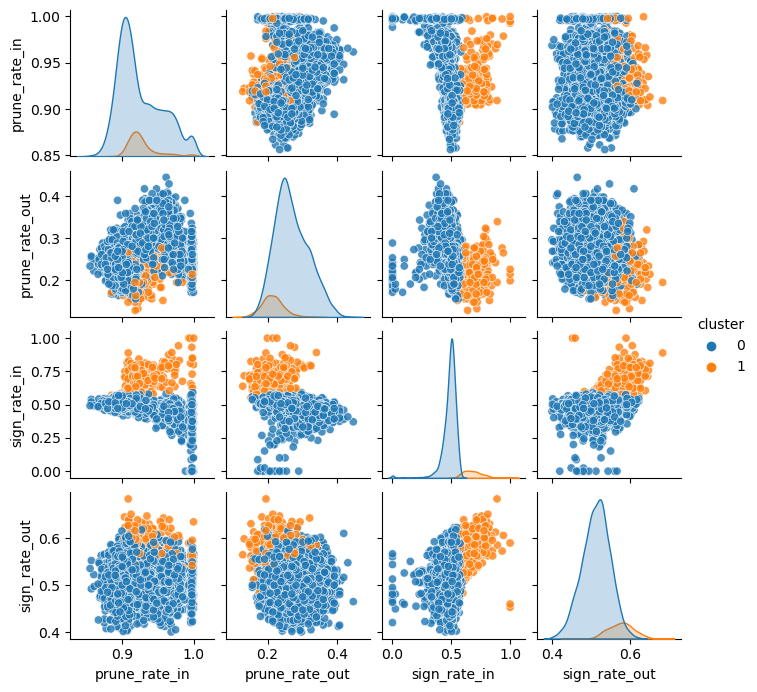

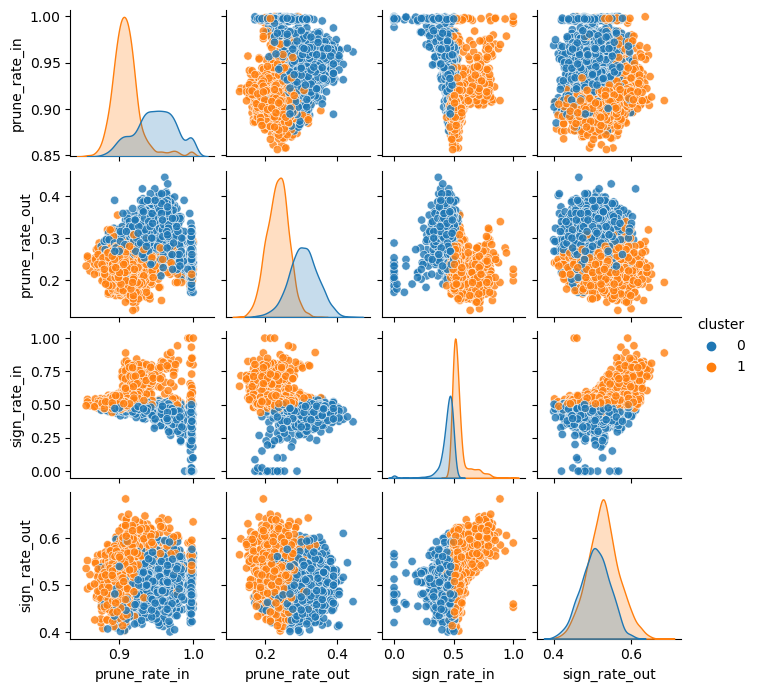

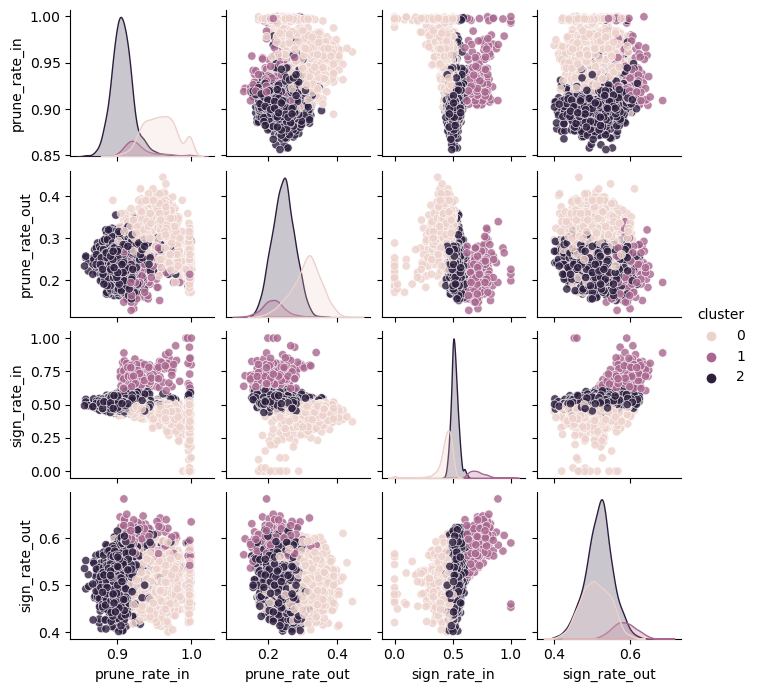

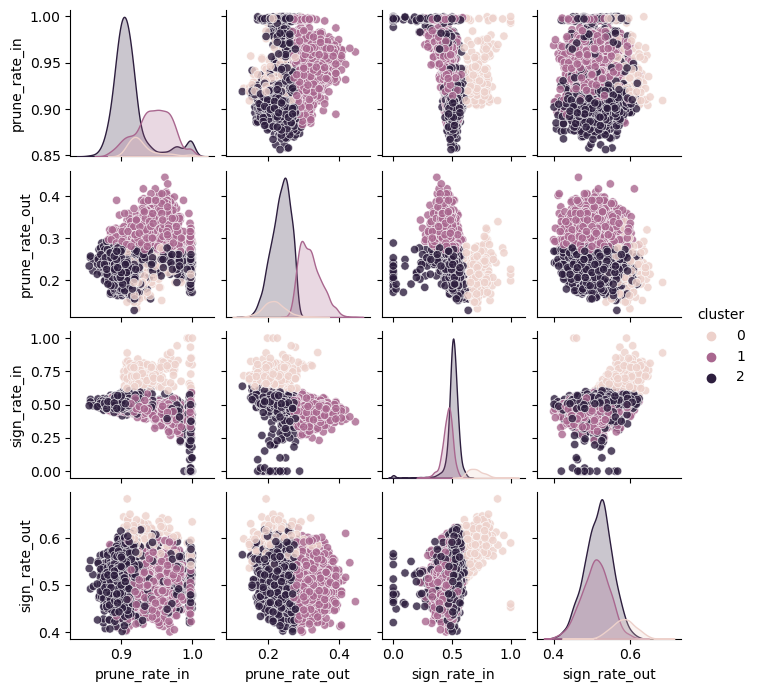

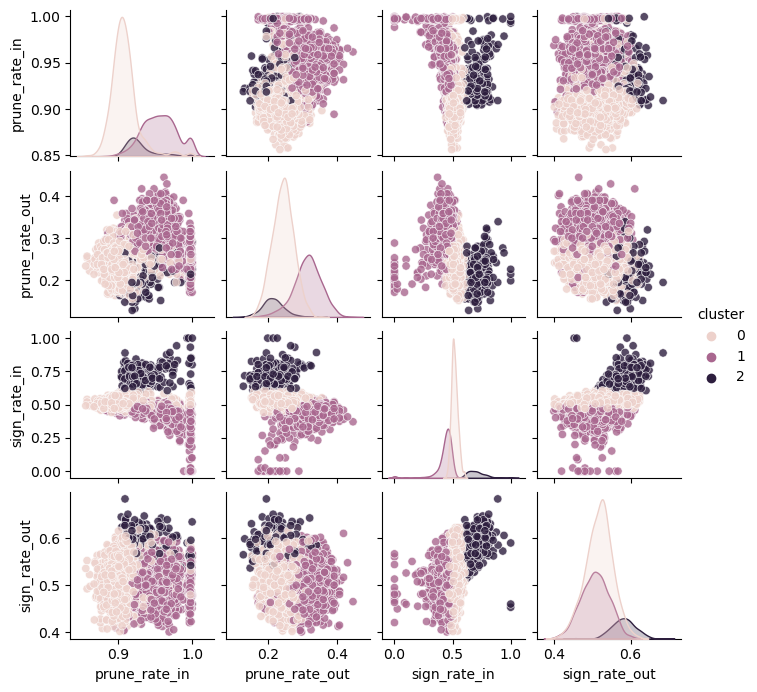

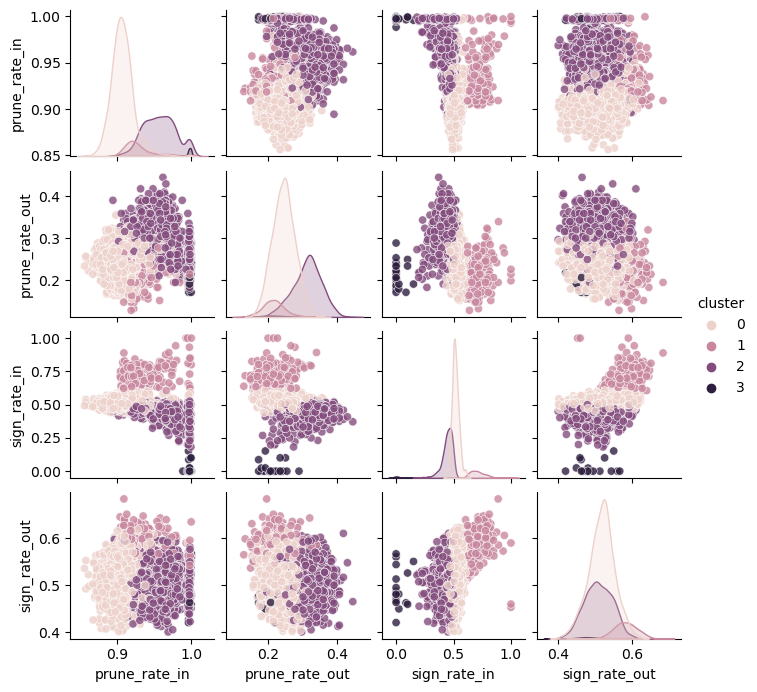

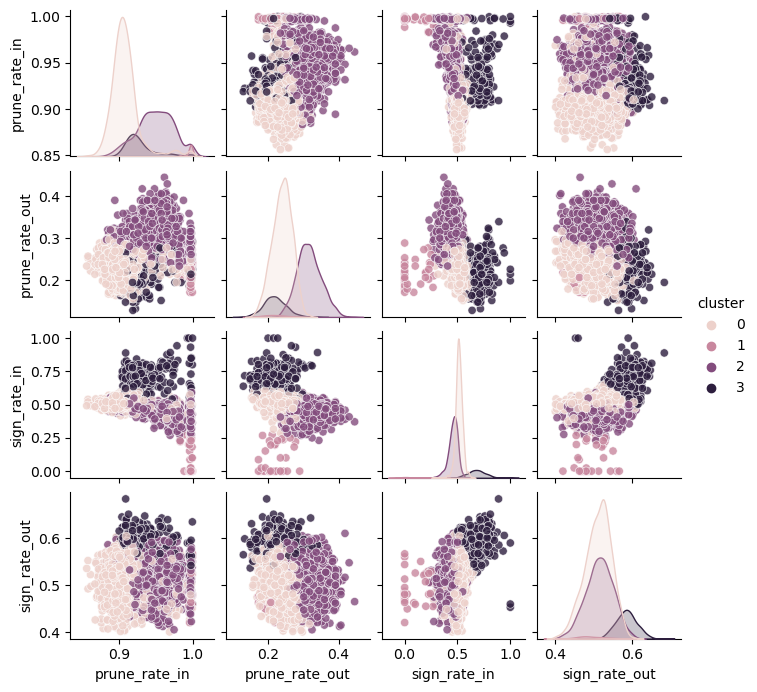

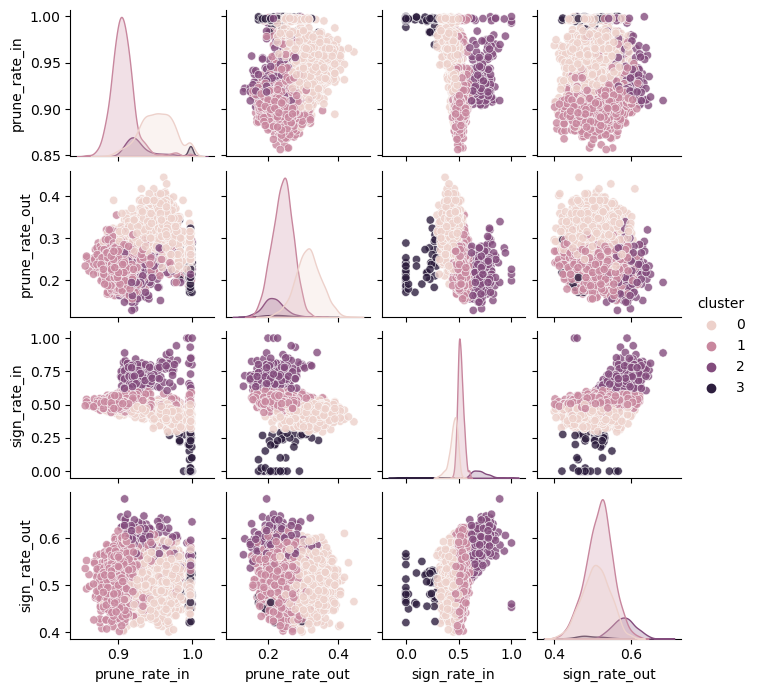

In [5]:
# try out different parameter choices

for  n_clusters in [2,3,4]:
    for algorithm in [AgglomerativeClustering, SpectralClustering, KMeans]:
        clusterd_sign_distr = cluster_sign_distr(coll_sign_distr_layer1, n_clusters=n_clusters, algorithm=algorithm)

C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

prune_rate_in  prune_rate_out  sign_rate_in  sign_rate_out  cluster
0          0.913391        0.218750      0.559549       0.480000        0
1          0.891235        0.226562      0.511785       0.515152        0
2          0.890381        0.250000      0.522272       0.421875        0
3          0.916016        0.320312      0.549419       0.574713        0
4          0.949463        0.355469      0.485507       0.521212        2
...             ...             ...           ...            ...      ...
3676       0.891052        0.257812      0.513165       0.521053        0
3677       0.998047        0.261719      0.375000       0.576720        2
3678       0.906494        0.238281      0.507180       0.507692        0
3679       0.894592        0.269531      0.471338       0.481283        0
3680       0.895813        0.230469      0.568248       0.461929        0

[3681 rows x 5 columns]

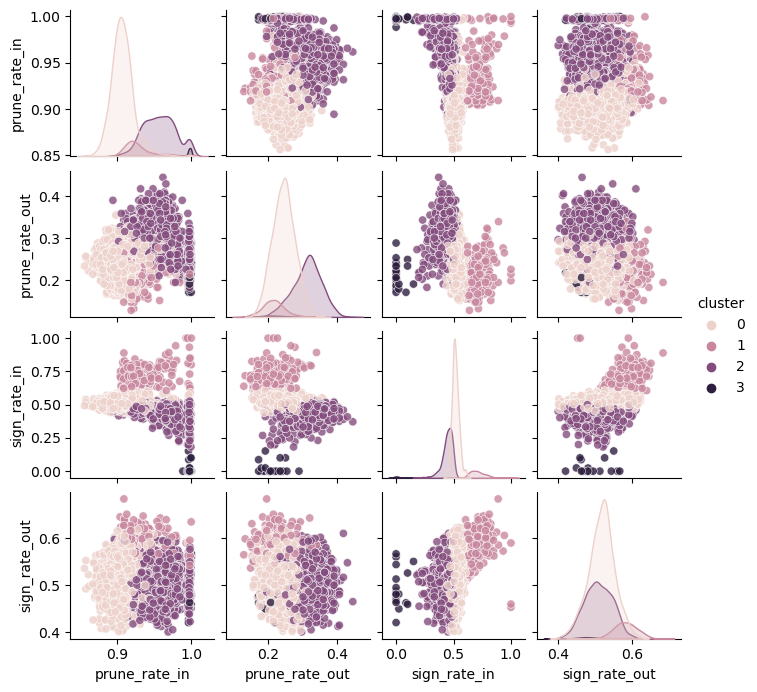

In [6]:
# check your parameter choice

cluster_sign_distr(coll_sign_distr_layer1, n_clusters=4, algorithm=AgglomerativeClustering)

In [7]:
# get the sign distributions of the other 3 collective sign distributions:

coll_sign_distr_cifar, coll_sign_distr_layer2 = get_collective_sign_distr(15, "CIFAR_IMP")
coll_sign_distr_cinic, coll_sign_distr_layer2 = get_collective_sign_distr(15, "CINIC_IMP")
coll_sign_distr_svhn, coll_sign_distr_layer2 = get_collective_sign_distr(15, "SVHN_IMP")
coll_sign_distr_rsn, coll_sign_distr_layer2 = get_collective_sign_distr(15, "RSN")

C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

prune_rate_in  prune_rate_out  sign_rate_in  sign_rate_out  cluster
0          0.942078        0.335938      0.451001       0.594118        1
1          0.882507        0.257812      0.551688       0.578947        1
2          0.871582        0.261719      0.500000       0.497354        1
3          0.985962        0.328125      0.369565       0.546512        0
4          0.853577        0.304688      0.516048       0.533708        1
...             ...             ...           ...            ...      ...
3199       0.969360        0.355469      0.450199       0.503030        0
3200       0.848083        0.304688      0.513459       0.539326        1
3201       0.949036        0.371094      0.371257       0.490683        0
3202       0.936096        0.363281      0.431710       0.509202        0
3203       0.954529        0.367188      0.468456       0.450617        0

[3204 rows x 5 columns]

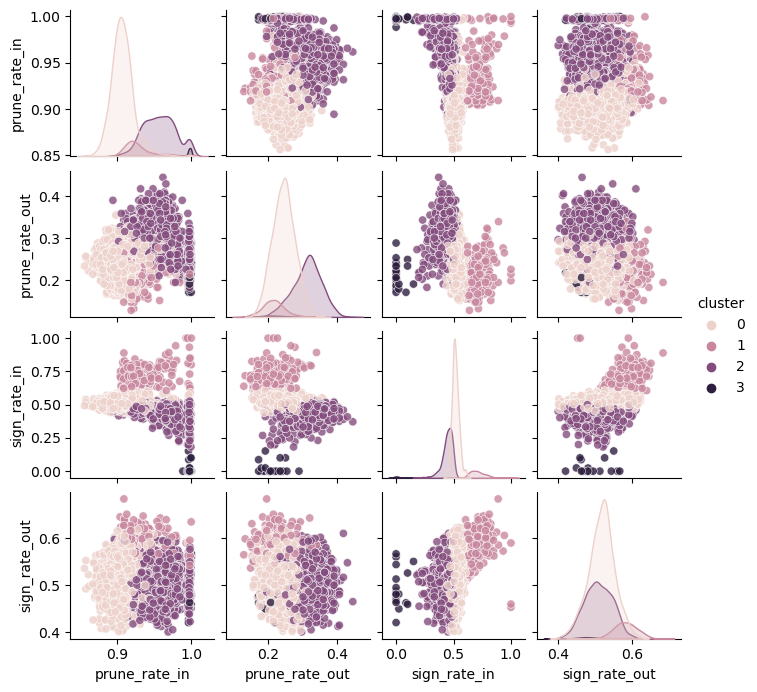

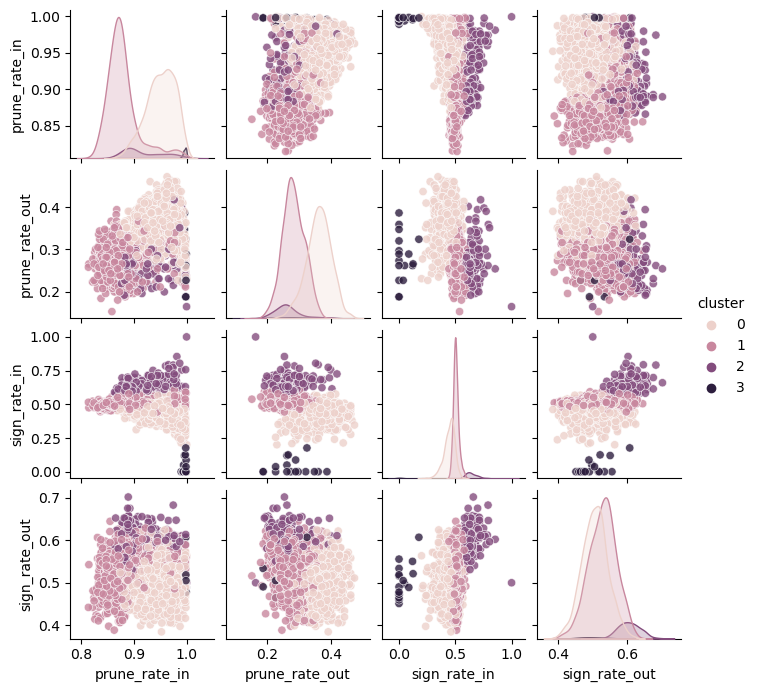

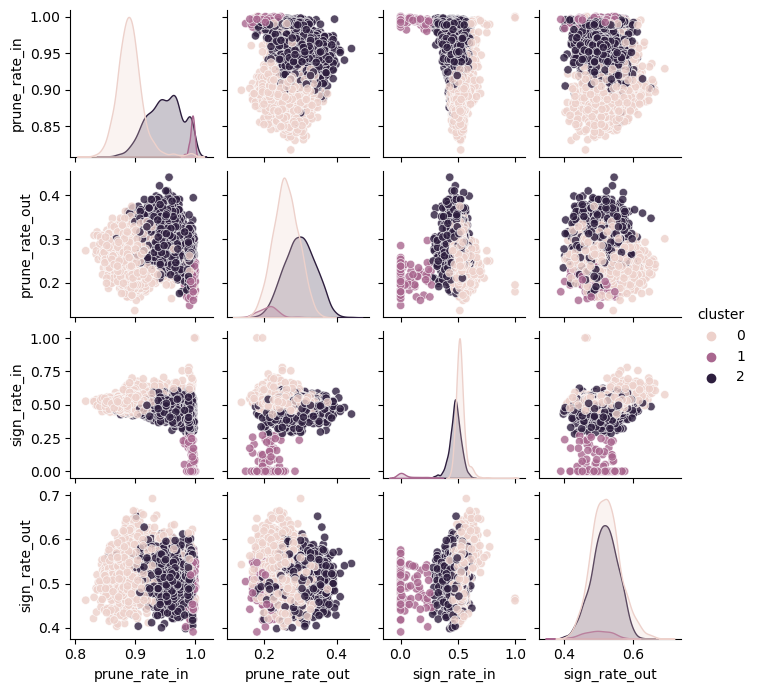

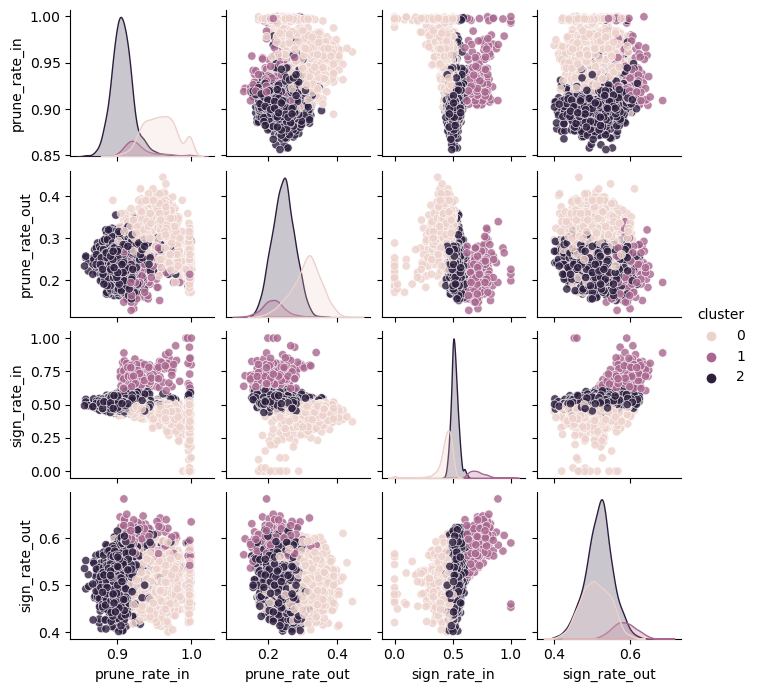

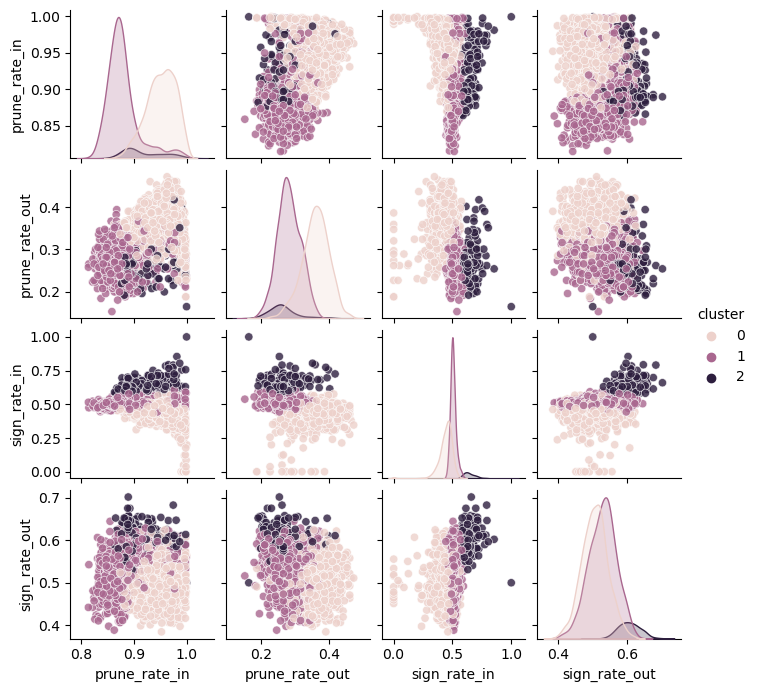

In [8]:
cluster_sign_distr(coll_sign_distr_cifar, n_clusters=4, algorithm=AgglomerativeClustering)
cluster_sign_distr(coll_sign_distr_cinic, n_clusters=4, algorithm=AgglomerativeClustering)
cluster_sign_distr(coll_sign_distr_svhn, n_clusters=3, algorithm=AgglomerativeClustering)
cluster_sign_distr(coll_sign_distr_cifar, n_clusters=3, algorithm=AgglomerativeClustering)
cluster_sign_distr(coll_sign_distr_cinic, n_clusters=3, algorithm=AgglomerativeClustering)

In [9]:
variables = ["prune_rate_in","prune_rate_out","sign_rate_in","sign_rate_out"]
datasets = ["CINIC_IMP", "CIFAR_IMP", "SVHN_IMP"]
n_clusters = [4,4,3]

# make a plot with mean and std of each cluster
all_cluster_stats = pd.DataFrame()
for dataset, n in zip(datsets,n_clusters):
    cluster_column_df = pd.DataFrame()
    for cluster in range(n):
        cluster_stats = {}
        for v in variables:
            dic["mean"] = 
            dic["std"] = 
            dic["ratio"] = 
        df = pd.DataFrame(cluster_stats, index=v)
        sign_distr = pd.concat([sign_distr, labels_df], axis=1)